In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [35]:
train_data = pd.read_csv(r'C:\Users\sreelekshmy\Downloads\train_ctrUa4K.csv',index_col="Loan_ID")
train_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [36]:
#null values checking
train_data.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [37]:
train_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [38]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, LP001002 to LP002990
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 62.4+ KB


In [39]:
# let see gender column distribution for each category
train_data["Gender"].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

[Text(0.5, 1.0, 'Gender count for each category')]

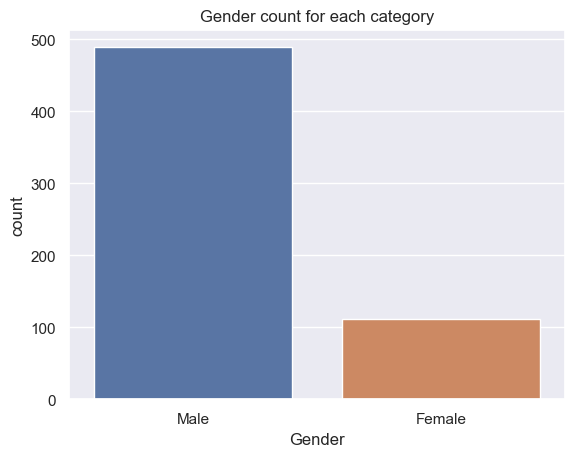

In [8]:
sns.countplot(x='Gender', data=train_data).set(title="Gender count for each category")

[Text(0.5, 1.0, 'Married count for each category')]

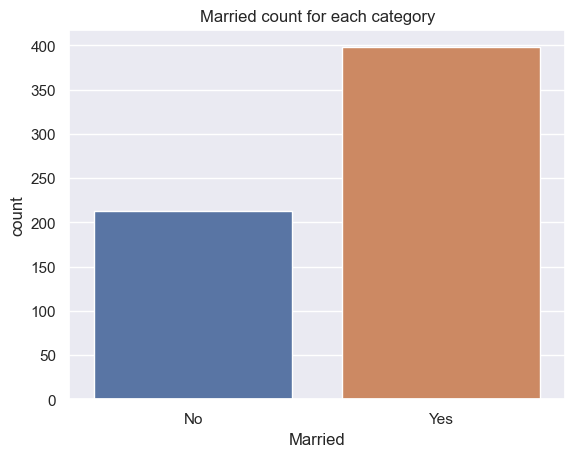

In [40]:
sns.countplot(x='Married', data=train_data).set(title="Married count for each category")

[Text(0.5, 1.0, 'Dependents count for each category')]

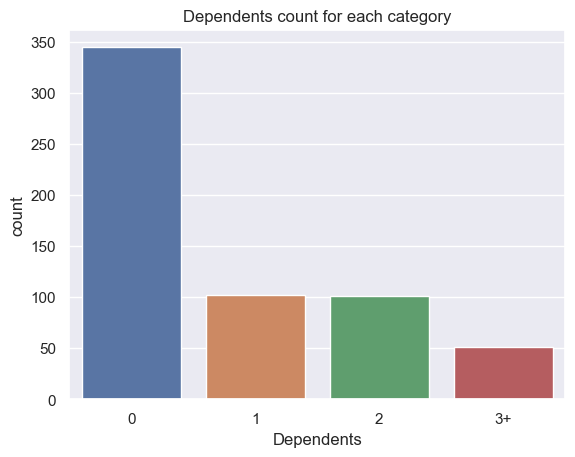

In [41]:
sns.countplot(x='Dependents', data=train_data).set(title="Dependents count for each category")

[Text(0.5, 1.0, 'Education count for each category')]

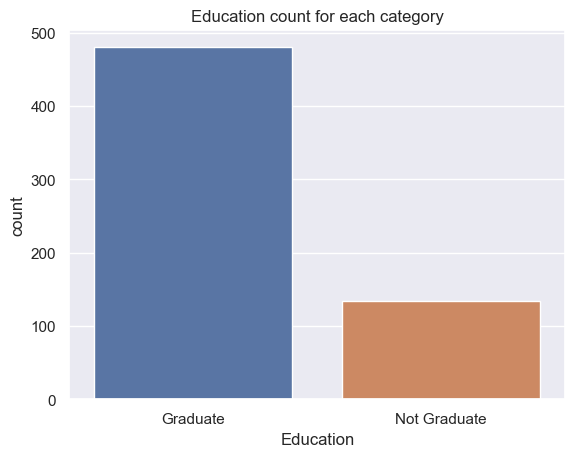

In [42]:
sns.countplot(x='Education', data=train_data).set(title="Education count for each category")

[Text(0.5, 1.0, 'Self_Employed count for each category')]

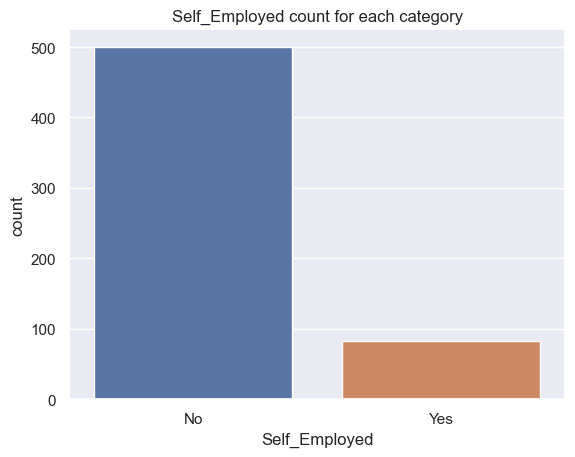

In [43]:
sns.countplot(x='Self_Employed', data=train_data).set(title="Self_Employed count for each category")

[Text(0.5, 1.0, 'Property_Area count for each category')]

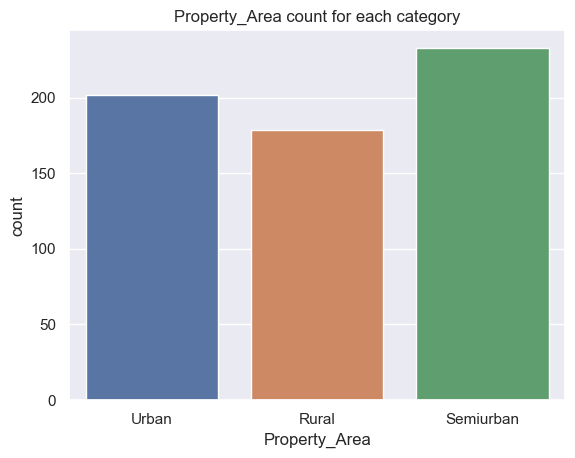

In [44]:
sns.countplot(x='Property_Area', data=train_data).set(title="Property_Area count for each category")

In [47]:
 for col in ["Gender","Married","Dependents","Self_Employed"]:
      train_data[col]=train_data[col].fillna(train_data[col].mode()[0])

In [49]:
for col in ["LoanAmount","Loan_Amount_Term","Loan_Amount_Term","Credit_History"]:
    train_data[col]=train_data[col].fillna(train_data[col].mean())

In [50]:
train_data.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

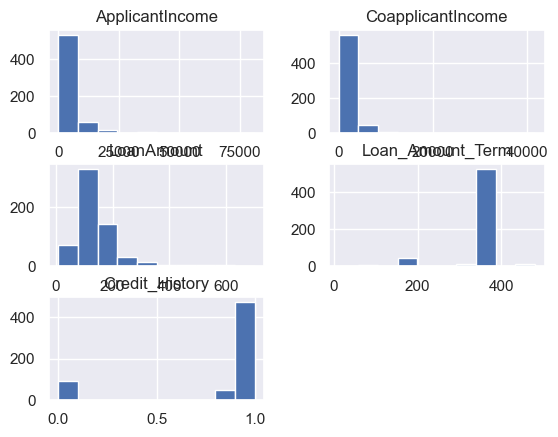

In [56]:
train_data.hist()
plt.show()

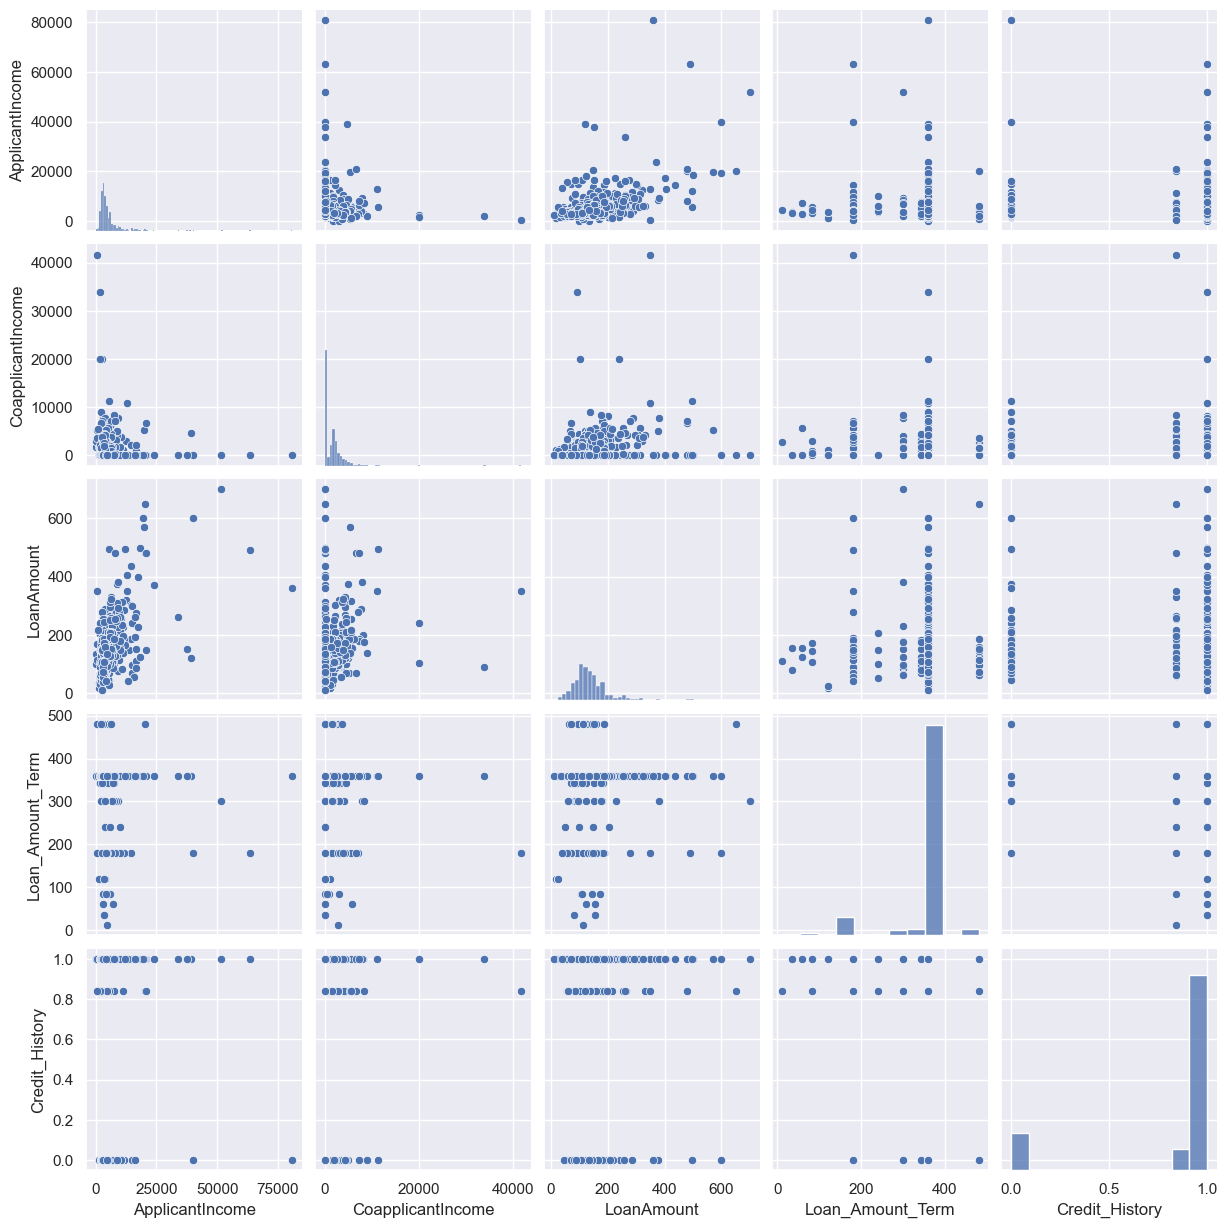

In [57]:
sns.pairplot(train_data)
plt.show()

C:\Users\sreelekshmy\AppData\Local\Temp\ipykernel_18032\295009620.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmatrix = train_data.corr()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.565620,-0.045242,-0.014477
CoapplicantIncome,-0.116605,1.000000,0.187828,-0.059675,-0.001665
LoanAmount,0.565620,0.187828,1.000000,0.038801,-0.007738
Loan_Amount_Term,-0.045242,-0.059675,0.038801,1.000000,0.001395
Credit_History,-0.014477,-0.001665,-0.007738,0.001395,1.000000


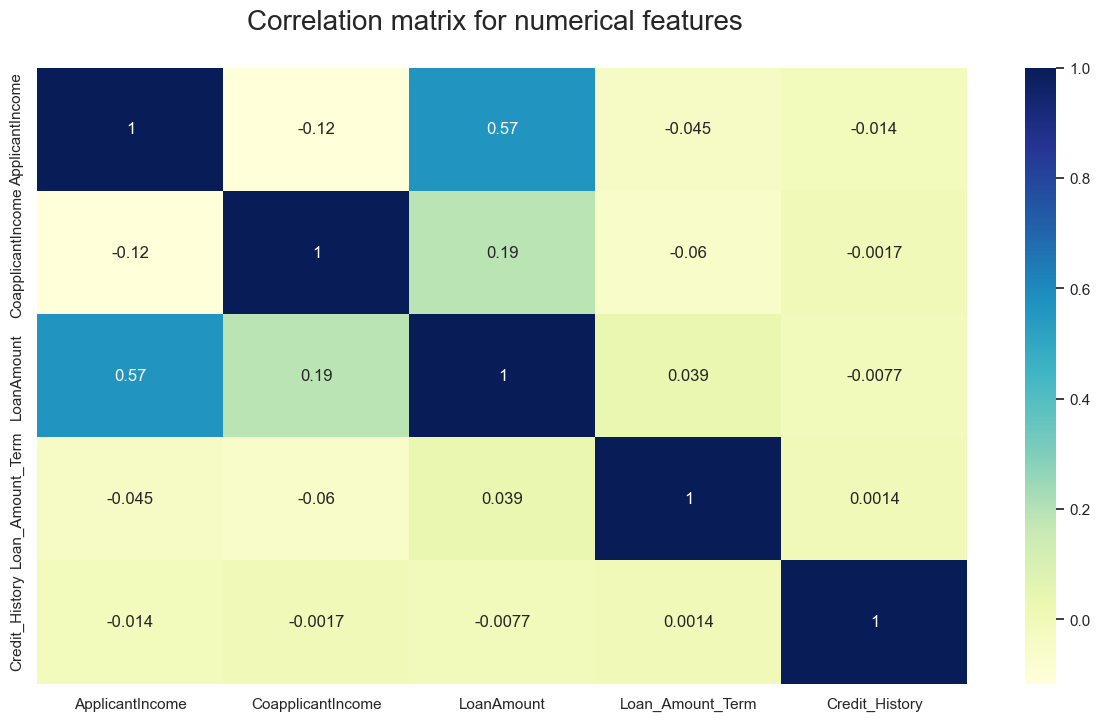

In [58]:
corrmatrix = train_data.corr()
plt.subplots(figsize =(15,8))
plt.title("Correlation matrix for numerical features  \n", size = 20)
sns.heatmap(corrmatrix, annot=True, cmap="YlGnBu")
corrmatrix

In [59]:
from sklearn.preprocessing import LabelEncoder

In [60]:
le = LabelEncoder()

In [61]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, LP001002 to LP002990
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 78.5+ KB


In [63]:
var_mod = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
le = LabelEncoder()
for i in var_mod:
    train_data[i] = le.fit_transform(train_data[i])

In [64]:
train_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


In [65]:
X = train_data.drop('Loan_Status',axis=1)
y = train_data['Loan_Status']

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)

# Decision tree model

In [68]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,accuracy_score


dt         = DecisionTreeClassifier(random_state = 42)
dt_model   = dt.fit(X_train, y_train)
y_pred_dt  = dt_model.predict(X_test)



# Confusion matrix and accuracy score

print(confusion_matrix(y_test, y_pred_dt))   # 46 misclassifications
print(accuracy_score(y_test, y_pred_dt))

[[23 20]
 [15 65]]
0.7154471544715447


# Logistic regression

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score


log_reg    = LogisticRegression()
model_log  = log_reg.fit(X_train ,y_train)
y_pred_log = model_log.predict(X_test)


# Confusion matrix and accuracy score

print(confusion_matrix(y_test,y_pred_log))  # 54 misclassifications
print(accuracy_score(y_test, y_pred_log))

[[18 25]
 [ 1 79]]
0.7886178861788617


# Knn model

[0.6178861788617886, 0.5609756097560976, 0.5853658536585366, 0.5691056910569106, 0.5853658536585366, 0.5853658536585366, 0.5772357723577236, 0.5609756097560976, 0.6016260162601627, 0.5853658536585366, 0.5934959349593496, 0.5853658536585366]


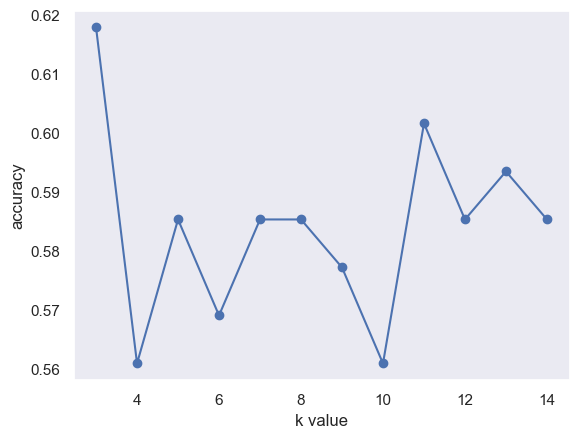

In [70]:
from sklearn.neighbors import KNeighborsClassifier
metric_k  = []
neighbors = np.arange(3, 15)


for k in neighbors:
    knn       =  KNeighborsClassifier(n_neighbors = k)
    knn_model =  knn.fit(X_train,y_train)
    knn_pred  =  knn_model.predict(X_test)
    knn_acc   =  accuracy_score(y_test,knn_pred)
    metric_k.append(knn_acc)
    
print(metric_k)   
    
    
#plotting graph

plt.plot(neighbors, metric_k, 'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.grid()

In [71]:
knn_10       =  KNeighborsClassifier(n_neighbors = 10)
knn_model_10 =  knn_10.fit(X_train,y_train)
knn_pred_10  =  knn_model_10.predict(X_test)
knn_pred_10




# Confusion matrix and accuracy score

print(confusion_matrix(y_test, knn_pred_10))
print(accuracy_score(y_test, knn_pred_10))

[[ 3 40]
 [14 66]]
0.5609756097560976


# Random Forest 

In [72]:
from sklearn.ensemble import RandomForestClassifier 

rf       = RandomForestClassifier(random_state = 42)
rf_model = rf.fit(X_train, y_train)
y_pred_rf  = rf_model.predict(X_test)



# Confusion matrix and accuracy score

print(confusion_matrix(y_test, y_pred_rf))  # 35 misclassifications
print(accuracy_score(y_test, y_pred_rf))

[[18 25]
 [ 3 77]]
0.7723577235772358


Based on train data, on comparing the accuracy of each model:

Logistic regression = 73.98%

kNN Model = 57.72%

Decision tree = 71.54%

Random Forest = 78.04%

From the above observation, random forest has the highest accuracy thus it can be considered as the best model to classify the data.

# Test data

In [73]:
test=pd.read_csv(r"C:\Users\sreelekshmy\Downloads\test_lAUu6dG.csv",index_col="Loan_ID")

In [74]:
td=pd.read_csv(r"C:\Users\sreelekshmy\Downloads\test_lAUu6dG.csv")

In [75]:
test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
Loan_ID,,,,,,,,,,,
LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [76]:
test.tail()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
Loan_ID,,,,,,,,,,,
LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural
LP002989,Male,No,0,Graduate,Yes,9200,0,98.0,180.0,1.0,Rural


In [77]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 367 entries, LP001015 to LP002989
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             356 non-null    object 
 1   Married            367 non-null    object 
 2   Dependents         357 non-null    object 
 3   Education          367 non-null    object 
 4   Self_Employed      344 non-null    object 
 5   ApplicantIncome    367 non-null    int64  
 6   CoapplicantIncome  367 non-null    int64  
 7   LoanAmount         362 non-null    float64
 8   Loan_Amount_Term   361 non-null    float64
 9   Credit_History     338 non-null    float64
 10  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(6)
memory usage: 34.4+ KB


In [78]:
test.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [79]:
test.isnull().sum()

Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [80]:
for col in ["Gender","Dependents","Self_Employed"]:
      test[col]=test[col].fillna(test[col].mode()[0])

In [81]:
for col in ["LoanAmount","Loan_Amount_Term","Credit_History"]:
     test[col]=test[col].fillna(test[col].median())

In [82]:
test.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [83]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 367 entries, LP001015 to LP002989
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             367 non-null    object 
 1   Married            367 non-null    object 
 2   Dependents         367 non-null    object 
 3   Education          367 non-null    object 
 4   Self_Employed      367 non-null    object 
 5   ApplicantIncome    367 non-null    int64  
 6   CoapplicantIncome  367 non-null    int64  
 7   LoanAmount         367 non-null    float64
 8   Loan_Amount_Term   367 non-null    float64
 9   Credit_History     367 non-null    float64
 10  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(6)
memory usage: 34.4+ KB


In [84]:
var_mod = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area',]
le = LabelEncoder()
for i in var_mod:
    test[i] = le.fit_transform(test[i])

In [85]:
test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
Loan_ID,,,,,,,,,,,
LP001015,1,1,0,0,0,5720,0,110.0,360.0,1.0,2
LP001022,1,1,1,0,0,3076,1500,126.0,360.0,1.0,2
LP001031,1,1,2,0,0,5000,1800,208.0,360.0,1.0,2
LP001035,1,1,2,0,0,2340,2546,100.0,360.0,1.0,2
LP001051,1,0,0,1,0,3276,0,78.0,360.0,1.0,2


# Prediction Using Random Classifier with Test Data

In [86]:
y_pred_test  = rf.predict(test)
y_pred_test

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,

# Creating a csv file with Predicted values

In [103]:
new_data = {"Loan_ID": td["Loan_ID"], "Loan_Status": y_pred_test}
df = pd.DataFrame(new_data, columns=["Loan_ID", "Loan_Status"])
df["Loan_Status"].replace(0,"N",inplace=True)
df["Loan_Status"].replace(1,"Y",inplace=True)
df.to_csv(r"C:\Users\sreelekshmy\Downloads\sample_submission_49d68Cx.csv", index= False)

In [104]:
data1=pd.read_csv(r"C:\Users\sreelekshmy\Downloads\sample_submission_49d68Cx.csv")

In [105]:
data1.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


In [106]:
data1.tail()

,Loan_ID,Loan_Status
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,Y
366,LP002989,Y
